# Project: Wrangling and Analyze Data

## Data Gathering


In [1193]:
# Read Libraries 
import pandas as pd 
import numpy as np 
import requests
import tweepy
import time 
import json
import re
import matplotlib.pyplot as plt 

1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [908]:
df_archive = pd.read_csv('twitter-archive-enhanced.csv')
df_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [64]:
# Download the 'image_predictions.tsv' file from the url 
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url, allow_redirects=True)
open('image_predictions.tsv', 'wb').write(response.content)

335079

In [65]:
# import 'image_predictions.tsv' file to a dataframe
df_image = pd.read_csv('image_predictions.tsv', sep='\t')
df_image.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [66]:
# Set API Keys and Tokens

# change the CONSUMER_KEY, CONSUMER_SECRET, ACCESS_TOKEN, ACCESS_SECRET by yours
consumer_key = 'CONSUMER_KEY'
consumer_secret = 'CONSUMER_SECRET'
access_token = 'ACCESS_TOKEN'
access_secret = 'ACCESS_SECRET'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

In [87]:
# Construct the API instance
api = tweepy.API(auth,
                 parser = tweepy.parsers.JSONParser(), # Parse the result to Json Object
                 wait_on_rate_limit = True, # Automatically wait for rate limits to replenish
                )

# Writing json data of all the tweets in df_archive to tweet_json.txt
start_time = time.time()

with open('tweet_json.txt', 'w') as file:
    for tweet_id in df_archive['tweet_id']:
        try:
            tweet = api.get_status(tweet_id,tweet_mode='extended')
            file.write(json.dumps(tweet) + '\n') # writing one tweet per line
        except Exception as e:
            print(e)

end_time = time.time()            
print('Whole process finished in {} seconds'.format(end_time - start_time)) # show time spent in seconds

404 Not Found
144 - No status found with that ID.
404 Not Found
144 - No status found with that ID.
404 Not Found
144 - No status found with that ID.
404 Not Found
144 - No status found with that ID.
404 Not Found
144 - No status found with that ID.
404 Not Found
144 - No status found with that ID.
404 Not Found
144 - No status found with that ID.
404 Not Found
144 - No status found with that ID.
404 Not Found
34 - Sorry, that page does not exist.
404 Not Found
144 - No status found with that ID.
404 Not Found
144 - No status found with that ID.
404 Not Found
144 - No status found with that ID.
404 Not Found
144 - No status found with that ID.
404 Not Found
144 - No status found with that ID.
404 Not Found
144 - No status found with that ID.
404 Not Found
144 - No status found with that ID.
404 Not Found
144 - No status found with that ID.
404 Not Found
144 - No status found with that ID.
404 Not Found
144 - No status found with that ID.
404 Not Found
144 - No status found with that ID

Rate limit reached. Sleeping for: 91


404 Not Found
144 - No status found with that ID.
404 Not Found
144 - No status found with that ID.
404 Not Found
144 - No status found with that ID.
404 Not Found
144 - No status found with that ID.


Rate limit reached. Sleeping for: 623


Failed to send request: ('Connection aborted.', ConnectionResetError(54, 'Connection reset by peer'))
Whole process finished in 2829.4322550296783 seconds


In [97]:
# Read the tweet_json.txt file 
selected_attr = [] 

with open('tweet_json.txt', 'r') as json_file:
    for line in json_file:
        json_data = json.loads(line)
        selected_attr.append({'tweet_id': json_data['id'], 
                              'retweets' : json_data['retweet_count'],
                              'favorites': json_data['favorite_count'], 
                              'timestamp' : json_data['created_at'] })

# Make it as a DataFrame
df_selected = pd.DataFrame(selected_attr, columns=['tweet_id', 'retweets', 'favorites', 'timestamp'])
df_selected

,tweet_id,retweets,favorites,timestamp
0,892420643555336193,7121,34256,Tue Aug 01 16:23:56 +0000 2017
1,892177421306343426,5363,29703,Tue Aug 01 00:17:27 +0000 2017
2,891815181378084864,3529,22360,Mon Jul 31 00:18:03 +0000 2017
3,891689557279858688,7313,37422,Sun Jul 30 15:58:51 +0000 2017
4,891327558926688256,7868,35751,Sat Jul 29 16:00:24 +0000 2017
...,...,...,...,...
2322,666049248165822465,37,91,Mon Nov 16 00:24:50 +0000 2015
2323,666044226329800704,117,251,Mon Nov 16 00:04:52 +0000 2015
2324,666033412701032449,36,102,Sun Nov 15 23:21:54 +0000 2015
2325,666029285002620928,39,115,Sun Nov 15 23:05:30 +0000 2015


## Assessing Data



### 1. Visual Assessment

In [103]:
df_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [100]:
df_image.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [101]:
df_selected.head()

,tweet_id,retweets,favorites,timestamp
0,892420643555336193,7121,34256,Tue Aug 01 16:23:56 +0000 2017
1,892177421306343426,5363,29703,Tue Aug 01 00:17:27 +0000 2017
2,891815181378084864,3529,22360,Mon Jul 31 00:18:03 +0000 2017
3,891689557279858688,7313,37422,Sun Jul 30 15:58:51 +0000 2017
4,891327558926688256,7868,35751,Sat Jul 29 16:00:24 +0000 2017


### 2. Programmatic Assessment

#### 1) `df_archive`

In [909]:
# summary of df_archive
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [910]:
# duplicated tweet_id 
df_archive[df_archive.tweet_id.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [911]:
# any null or 0 data in rating_numerator 
df_archive[(df_archive['rating_numerator'].isnull()) | (df_archive['rating_numerator'] == 0)]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
315,835152434251116546,NaN,NaN,2017-02-24 15:40:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you're so blinded by your systematic plag...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/835152434...,0,10,None,None,None,None,None
1016,746906459439529985,7.468859e+17,4.196984e+09,2016-06-26 03:22:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...","PUPDATE: can't see any. Even if I could, I cou...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/746906459...,0,10,None,None,None,None,None


In [912]:
# any null or 0 data in rating_denominator 
df_archive[(df_archive['rating_denominator'].isnull()) | (df_archive['rating_denominator'] == 0)]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None


In [913]:
# rating numerator should not be less than 10 
df_archive[df_archive.rating_numerator < 10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
45,883482846933004288,NaN,NaN,2017-07-08 00:28:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She hopes her smile made you sm...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/883482846...,5,10,Bella,None,None,None,None
229,848212111729840128,NaN,NaN,2017-04-01 16:35:01 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jerry. He's doing a distinguished tong...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/848212111...,6,10,Jerry,None,None,None,None
315,835152434251116546,NaN,NaN,2017-02-24 15:40:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you're so blinded by your systematic plag...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/835152434...,0,10,None,None,None,None,None
387,826598799820865537,8.265984e+17,4.196984e+09,2017-02-01 01:11:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...","I was going to do 007/10, but the joke wasn't ...",NaN,NaN,NaN,NaN,7,10,None,None,None,None,None
462,817502432452313088,NaN,NaN,2017-01-06 22:45:43 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Herschel. He's slightly bi...,6.924173e+17,4.196984e+09,2016-01-27 18:42:06 +0000,https://twitter.com/dog_rates/status/692417313...,7,10,Herschel,None,None,pupper,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [914]:
# rating denominator should be 10 
df_archive[df_archive.rating_denominator != 10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None


In [915]:
# missing names
df_archive[df_archive.name=='None']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
12,889665388333682689,NaN,NaN,2017-07-25 01:55:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo that seems to be on the fence a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889665388...,13,10,None,None,None,None,puppo
24,887343217045368832,NaN,NaN,2017-07-18 16:08:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",You may not have known you needed to see this ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887343217...,13,10,None,None,None,None,None
25,887101392804085760,NaN,NaN,2017-07-18 00:07:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This... is a Jubilant Antarctic House Bear. We...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887101392...,12,10,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2342,666082916733198337,NaN,NaN,2015-11-16 02:38:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a well-established sunblockerspan...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666082916...,6,10,None,None,None,None,None
2343,666073100786774016,NaN,NaN,2015-11-16 01:59:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Let's hope this flight isn't Malaysian (lol). ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666073100...,10,10,None,None,None,None,None
2344,666071193221509120,NaN,NaN,2015-11-16 01:52:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a northern speckled Rhododendron....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666071193...,9,10,None,None,None,None,None
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None


In [916]:
# invalid names starting with lower case or "None", "NaN", "Not" etc. 
df_archive[df_archive.name.str.match(r'(?:\b[a-z]+|\bNone\b|\bNaN\b|\bNot\b)')==True]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
12,889665388333682689,NaN,NaN,2017-07-25 01:55:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo that seems to be on the fence a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889665388...,13,10,None,None,None,None,puppo
22,887517139158093824,NaN,NaN,2017-07-19 03:39:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I've yet to rate a Venezuelan Hover Wiener. Th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887517139...,14,10,such,None,None,None,None
24,887343217045368832,NaN,NaN,2017-07-18 16:08:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",You may not have known you needed to see this ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887343217...,13,10,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [917]:
# missing expanded urls 
df_archive[df_archive.expanded_urls.isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
179,857214891891077121,8.571567e+17,1.806710e+08,2017-04-26 12:48:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Marc_IRL pixelated af 12/10,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
185,856330835276025856,NaN,NaN,2017-04-24 02:15:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Jenna_Marbles: @dog_rates Thanks for ratin...,8.563302e+17,66699013.0,2017-04-24 02:13:14 +0000,NaN,14,10,None,None,None,None,None
186,856288084350160898,8.562860e+17,2.792810e+08,2017-04-23 23:26:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@xianmcguire @Jenna_Marbles Kardashians wouldn...,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666,10,None,None,None,None,None


In [918]:
# check if the last part of the tweet URL and the tweet_id is identical 
df_archive_copy = df_archive.copy()
df_archive_copy['extract_url'] = df_archive_copy.expanded_urls.str.extract(r'/status/(\d*)',expand=False) # extracted the tweet id part from url
df_archive_copy['tweet_id_str'] = df_archive_copy.tweet_id.astype(str) # tweet_id in str datatype

df_archive_copy[(df_archive_copy.tweet_id_str != df_archive_copy.extract_url) & ~(df_archive_copy.extract_url.isnull())]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,extract_url,tweet_id_str
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None,887473957103951883,888202515573088257
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None,886053434075471873,886054160059072513
35,885518971528720385,NaN,NaN,2017-07-13 15:19:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I have a new hero and his name is Howard. 14/1...,NaN,NaN,NaN,https://twitter.com/4bonds2carbon/status/88551...,14,10,None,None,None,None,None,885517367337512960,885518971528720385
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,None,None,830583320585068544,885311592912609280
42,884247878851493888,NaN,NaN,2017-07-10 03:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",OMG HE DIDN'T MEAN TO HE WAS JUST TRYING A LIT...,NaN,NaN,NaN,https://twitter.com/kaijohnson_19/status/88396...,13,10,None,None,None,None,None,883965650754039809,884247878851493888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1237,712309440758808576,NaN,NaN,2016-03-22 16:06:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Reminder that we made our first set of sticker...,NaN,NaN,NaN,https://twitter.com/stickergrub/status/7099191...,12,10,None,None,None,pupper,None,709919141004595201,712309440758808576
1242,711998809858043904,NaN,NaN,2016-03-21 19:31:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @twitter: @dog_rates Awesome Tweet! 12/10. ...,7.119983e+17,7.832140e+05,2016-03-21 19:29:52 +0000,https://twitter.com/twitter/status/71199827977...,12,10,None,None,None,None,None,711998279773347841,711998809858043904
1324,706169069255446529,NaN,NaN,2016-03-05 17:26:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",He was doing his best. 12/10 I'll be his lawye...,NaN,NaN,NaN,https://twitter.com/wgnnews/status/70616592080...,12,10,None,None,None,None,None,706165920809492480,706169069255446529
2259,667550904950915073,NaN,NaN,2015-11-20 03:51:52 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",RT @dogratingrating: Exceptional talent. Origi...,6.675487e+17,4.296832e+09,2015-11-20 03:43:06 +0000,https://twitter.com/dogratingrating/status/667...,12,10,None,None,None,None,None,667548695664070656,667550904950915073


#### 2) `df_image`

In [919]:
# summary of df_image
df_image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [920]:
# duplicated tweet id 
df_image[df_image.tweet_id.duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [921]:
# images not a dog
df_image[(df_image.p1_dog==False) & (df_image.p2_dog==False) & (df_image.p3_dog==False)]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,hen,0.965932,False,cock,0.033919,False,partridge,0.000052,False
18,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,desktop_computer,0.086502,False,desk,0.085547,False,bookcase,0.079480,False
21,666293911632134144,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1,three-toed_sloth,0.914671,False,otter,0.015250,False,great_grey_owl,0.013207,False
25,666362758909284353,https://pbs.twimg.com/media/CT9lXGsUcAAyUFt.jpg,1,guinea_pig,0.996496,False,skunk,0.002402,False,hamster,0.000461,False
...,...,...,...,...,...,...,...,...,...,...,...,...
2021,880935762899988482,https://pbs.twimg.com/media/DDm2Z5aXUAEDS2u.jpg,1,street_sign,0.251801,False,umbrella,0.115123,False,traffic_light,0.069534,False
2022,881268444196462592,https://pbs.twimg.com/media/DDrk-f9WAAI-WQv.jpg,1,tusker,0.473303,False,Indian_elephant,0.245646,False,ibex,0.055661,False
2046,886680336477933568,https://pbs.twimg.com/media/DE4fEDzWAAAyHMM.jpg,1,convertible,0.738995,False,sports_car,0.139952,False,car_wheel,0.044173,False
2052,887517139158093824,https://pbs.twimg.com/ext_tw_video_thumb/88751...,1,limousine,0.130432,False,tow_truck,0.029175,False,shopping_cart,0.026321,False


#### 3)  `df_selected`

In [922]:
# summary of df_selected
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet_id   2327 non-null   int64 
 1   retweets   2327 non-null   int64 
 2   favorites  2327 non-null   int64 
 3   timestamp  2327 non-null   object
dtypes: int64(3), object(1)
memory usage: 72.8+ KB


In [923]:
df_selected.describe()

,tweet_id,retweets,favorites
count,2.327000e+03,2327.00000,2327.000000
mean,7.418672e+17,2506.81951,7144.192523
std,6.823368e+16,4248.66737,11104.540406
min,6.660209e+17,1.00000,0.000000
25%,6.781394e+17,504.00000,1241.000000
50%,7.182346e+17,1167.00000,3088.000000
75%,7.986692e+17,2905.00000,8717.000000
max,8.924206e+17,71915.00000,146701.000000


### Quality issues

1. We only need original tweets with dog images. So retweets, replies need to be deleted from the `df_archive`.<br>   Also any rows without a dog image need to be deleted from the `df_image`.<br>
   Then only include rows in `df_archive` which are existed in `df_image` table based on the *tweet_id*.


2. rating numerator and rating denominater have null / 0 values.  


3. wrong rating numerator and rating denominator values which include decimal points.


4. rating numerator should not be less than 10. And rating denominator should be 10.     


5. missing or invalid *names*. (some of values written as "None", "Not", "a", "such", "NaN", etc.)    


6. wrong data types (below columns need to be converted to object from int/float in `df_archive`, `df_selected`)
    - tweet_id
    - in_reply_to_status_id 
    - in_reply_to_user_id  
    - retweeted_status_id 
    - retweeted_status_user_id    


7. wrong data types (*timestamp* column should be converted to datetime from object in `df_archive`, `df_selected`)


8. wrong data types (*p1_dog*, *p2_dog*, *p3_dog* columns should be converted to category from object in `df_image`)


9. In some rows, the last part of the *expanded_urls* which indicates tweet id was not the same value with *tweet_id*.


### Tidiness issues
1. Colums for dog stages in `df_archive` are divided into 4 columns - *doggo*, *floofer*, *pupper*, *puppo*. <br>
   They can be merged into one column 'dog stage' and the each column headers should be values in the 'dog stage' column. 


2. `df_selected` and `df_archive` can be merged into one table as both contains information about tweet archives. 


3. After deleting rows that are retweets or replies from `df_archive`, we don't need related 5 columns anynore.    
   *in_reply_to_status_id*, *in_reply_to_user_id*, *retweeted_status_id*, *retweeted_status_user_id*, *retweeted_status_timestamp* 

## Cleaning Data


In [1037]:
# Make copies of original pieces of data
archive = df_archive.copy()
image = df_image.copy()
selected = df_selected.copy()

### Issue #1: Deleting unnecessary retweet & reply rows and rows without dog image from `archive` and drop the related columns. 

#### Define: 
Exclude retweet & reply rows from `archive`. 

Only include rows with dog image. Exclude rows with all False values in *p1_dogs*, *p2_dogs*, *p3_dogs* columns from `image`.    
Then use `isin()` method to filter only rows with tweet_id in `image`. 

#### Code

In [1038]:
# Only include rows with NaN values in reply status id & retweet status id
archive = archive[archive.in_reply_to_status_id.isnull() & archive.retweeted_status_id.isnull()]

In [1039]:
# Only include rows with dog images
image = image[(image.p1_dog==True) | (image.p2_dog==True) | (image.p3_dog==True)]

In [1040]:
# Only include rows with tweet_id in 'image' table
archive = archive[archive.tweet_id.isin(image.tweet_id)]

#### Test

In [1041]:
archive[~(archive.in_reply_to_status_id.isnull()|archive.in_reply_to_user_id.isnull()
          |archive.retweeted_status_id.isnull() |archive.retweeted_status_user_id.isnull()
          |archive.retweeted_status_timestamp.isnull())]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [1042]:
archive[~archive.tweet_id.isin(image.tweet_id)]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [1043]:
image[(image.p1_dog==False) & (image.p2_dog==False) & (image.p3_dog==False)]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


### Issue #2: After deleting rows that are retweets or replies from df_archive, we don't need related 5 columns anynore.

#### Define
Drop 5 columns from `df_archive`. 
- in_reply_to_status_id
- in_reply_to_user_id
- retweeted_status_id
- retweeted_status_user_id
- retweeted_status_timestamp

#### Code

In [1044]:
# drop related columns with reply and retweet
archive = archive.drop(columns=['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1)

#### Test

In [1045]:
archive.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None


### Issue #3: Colums for dog stages in df_archive are divided into 4 columns - doggo, floofer, pupper, puppo. They can be merged into one column 'dog stage' and the each column headers should be values in the 'dog stage' column.

#### Define
Merge doggo, floofer, pupper, puppo columns to a 'dog_stage' column according to the following steps below.

1. Set the None values to np.nan in all the 4 dog stage columns.

2. Concatenate all 4 columns to 1 column dog_stage. For multiple values, add comma(,) like `doggo, pupper`. 

3. Remove the original 4 columns of dog stages.

#### Code

In [1046]:
# Set the "None" values to np.nan 
archive.loc[archive.doggo=='None', 'doggo'] = np.nan
archive.loc[archive.floofer=='None', 'floofer'] = np.nan
archive.loc[archive.pupper=='None', 'pupper'] = np.nan
archive.loc[archive.puppo=='None', 'puppo'] = np.nan

In [1047]:
# Concatenate all 4 columns to "dog_stage" column 
archive['dog_stage'] = archive[archive.columns[8:]].apply(
    lambda x: ','.join(x.dropna().astype(str)),axis=1 
    )

In [1048]:
# Remove the original 4 columns of dog stages 
archive = archive.drop(columns=['doggo', 'floofer', 'pupper', 'puppo'], axis=1)

#### Test

In [1049]:
# value counts for "dog_stage"
archive.dog_stage.value_counts()

                 1409
pupper            166
doggo              54
puppo              21
floofer             7
doggo,pupper        7
doggo,puppo         1
doggo,floofer       1
Name: dog_stage, dtype: int64

In [1050]:
archive.sample(10)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
1371,702276748847800320,2016-02-23 23:39:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...","""AND IIIIIIIIIIIEIIIIIIIIIIIII WILL ALWAYS LOV...",https://twitter.com/dog_rates/status/702276748...,11,10,None,
2217,668528771708952576,2015-11-22 20:37:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Gòrdón. He enjoys his razberrita by po...,https://twitter.com/dog_rates/status/668528771...,12,10,Gòrdón,
2225,668286279830867968,2015-11-22 04:33:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Rusty. Rusty's dreaming of a world where ...,https://twitter.com/dog_rates/status/668286279...,11,10,Rusty,
1719,680161097740095489,2015-12-24 23:00:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Goliath. He's an example of irony. Head i...,https://twitter.com/dog_rates/status/680161097...,12,10,Goliath,
641,793226087023144960,2016-10-31 23:00:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Juno. She spooked me up real good, but...",https://twitter.com/dog_rates/status/793226087...,11,10,Juno,
34,885528943205470208,2017-07-13 15:58:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Maisey. She fell asleep mid-excavation...,https://twitter.com/dog_rates/status/885528943...,13,10,Maisey,
2035,671735591348891648,2015-12-01 17:00:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Oscar. He's ready for Christmas. 11/10...,https://twitter.com/dog_rates/status/671735591...,11,10,Oscar,
1795,677314812125323265,2015-12-17 02:30:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Meet Tassy &amp; Bee. Tassy is pretty chill, b...",https://twitter.com/dog_rates/status/677314812...,10,10,Tassy,
120,869702957897576449,2017-05-30 23:51:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Stanley. He likes road trips. Will shift ...,https://twitter.com/dog_rates/status/869702957...,13,10,Stanley,
2000,672488522314567680,2015-12-03 18:52:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Jackie. She was all ready to go out, b...",https://twitter.com/dog_rates/status/672488522...,10,10,Jackie,


### Issue #4: df_selected and df_archive can be merged into one table as both contains information about tweet archives.

#### Define
Merge `df_selected` and `df_archive`. 

#### Code

In [1051]:
# Merge two dataframe
archive = archive.merge(selected, on=['tweet_id'], how='left', suffixes = ('','_selected'))

In [1052]:
# drop timestamp_selected column 
archive = archive.drop(columns='timestamp_selected', axis=1)

#### Test

In [1053]:
archive.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweets,favorites
0,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,,5363.0,29703.0
1,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,,3529.0,22360.0
2,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,,7313.0,37422.0
3,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,,7868.0,35751.0
4,891087950875897856,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,None,,2640.0,18047.0


### Issue #5: Rating Numerator and Rating Denominator have null / 0 values. 

#### Define: 
Find rows with null or 0 in *rating_numerator* and *rating_denominator* columns and drop the rows. 

#### Code

In [1054]:
# any null or 0 in rating numerator 
archive[archive.rating_numerator.isnull() | archive.rating_numerator == 0]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweets,favorites
205,835152434251116546,2017-02-24 15:40:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you're so blinded by your systematic plag...,https://twitter.com/dog_rates/status/835152434...,0,10,None,,2815.0,21256.0


In [1055]:
# any null or 0 in rating denominator 
archive[(archive['rating_denominator'].isnull()) | (archive['rating_denominator'] == 0)]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweets,favorites


In [1056]:
# drop 1 row 
archive = archive[~(archive.rating_numerator.isnull() | archive.rating_numerator == 0)]

#### Test

In [1057]:
archive[archive.rating_numerator.isnull() | archive.rating_numerator == 0]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweets,favorites


### Issue #6: wrong rating numerator and rating denominator values which include decimal points.

#### Define
Extract rating numerator and denominator values including decimal points from *text* column using `extract()` and round the newly extracted value to integer and update the wrong data. 

#### Code

In [1058]:
# Extract rating numerator and denominator from 'text'
archive['numerator'] = archive.text.str.extract(r'(\d+[.,]?\d*?)/\d+').astype(float).round().astype(int, errors='ignore')
archive['denominator']= archive.text.str.extract(r'\d+[.,]?\d*?/(\d+)').astype(float).round().astype(int, errors='ignore')

#### Test

In [1059]:
# the 4 rows with wrong rating_numerator
archive[archive.rating_numerator != archive.numerator]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweets,favorites,numerator,denominator
36,883482846933004288,2017-07-08 00:28:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She hopes her smile made you sm...,https://twitter.com/dog_rates/status/883482846...,5,10,Bella,,8380.0,40782.0,14,10
450,786709082849828864,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",https://twitter.com/dog_rates/status/786709082...,75,10,Logan,,5821.0,17607.0,10,10
495,778027034220126208,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,https://twitter.com/dog_rates/status/778027034...,27,10,Sophie,pupper,1511.0,6290.0,11,10
1190,680494726643068929,2015-12-25 21:06:00 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have uncovered an entire battalion of ...,https://twitter.com/dog_rates/status/680494726...,26,10,None,,448.0,1596.0,11,10


In [1060]:
# 0 for rating_denominator
archive[archive.rating_denominator != archive.denominator]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweets,favorites,numerator,denominator


In [1061]:
# drop rating_numerator and rating_denominator columns
archive = archive.drop(columns=['rating_numerator', 'rating_denominator'], axis=1)

### Issue #7: rating numerator should not be less than 10. And rating denominator should be 10.

#### Define

* In the above issue, *rating_numerator* and *rating_denominator* columns were dropped so I will use newly extracted *numerator* and *denominator* columns instead.   

Rating numerator should be equal to or greater than 10. 10 needs to be added for smaller values using `lambda` function.   
Rating denominator should be equal to 10. Any value that is not equal to 10 needs to be revised. 

#### Code

In [1062]:
# numerator smaller than 10 
archive[archive.numerator < 10].numerator.sort_values()

1648    1
1580    2
1228    2
849     3
807     3
       ..
1417    9
1416    9
1065    9
1021    9
948     9
Name: numerator, Length: 276, dtype: int64

In [1063]:
# if numerator is smaller than 10, add 10
archive['numerator']=archive['numerator'].apply(lambda x: x+10 if x<10 else x)

In [1064]:
# if denominator is not equal to 10, 
archive[archive.denominator != 10].shape[0] # total 17 rows

16

In [1065]:
# if denominator is not equal to 10, drop the rows
archive = archive.drop(archive[archive.denominator != 10].index)

#### Test

In [1066]:
archive[archive.numerator < 10]

,tweet_id,timestamp,source,text,expanded_urls,name,dog_stage,retweets,favorites,numerator,denominator


In [1067]:
archive[archive.denominator != 10]

,tweet_id,timestamp,source,text,expanded_urls,name,dog_stage,retweets,favorites,numerator,denominator


### Issue #8: missing or invalid names. (some of values written as "None", "Not", "a", "such", "NaN", etc.)

#### Define

Some of *names* in `archive` are missing or invalid ("NaN", "None", "Not", "a", "such", etc.), so I will convert those values into NaN. 

#### Code

In [1068]:
# Convert to NaN for missing or invalid names staring with lowercase letter
archive.loc[(archive.name.isnull()) | (archive.name.str.match(r'(?:\b[a-z]+|\bNone\b|\bNaN\b|\bNot\b)')==True), 'name'] = np.nan

#### Test

In [1069]:
archive.loc[archive.name.str.match(r'(?:\b[a-z]+|\bNone\b|\bNaN\b|\bNot\b)')==True] 

,tweet_id,timestamp,source,text,expanded_urls,name,dog_stage,retweets,favorites,numerator,denominator


### Issue #9: wrong data types (below columns need to be converted to object from int/float)

#### Define
Change column datatype to object from int / float for below columns.   
- tweet_id
- in_reply_to_status_id 
- in_reply_to_user_id  
- retweeted_status_id 
- retweeted_status_user_id 

Since I already dropped the 4 columns above except *tweet_id*, I will just convert data type of *tweet_id*.

#### Code

In [1216]:
# tweet_id 
archive.tweet_id = archive.tweet_id.astype(str)
image.tweet_id = image.tweet_id.astype(str)

#### Test

In [1217]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1649 entries, 0 to 1665
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype              
---  ------         --------------  -----              
 0   tweet_id       1649 non-null   object             
 1   timestamp      1649 non-null   datetime64[ns, UTC]
 2   source         1649 non-null   object             
 3   text           1649 non-null   object             
 4   expanded_urls  1649 non-null   object             
 5   name           1183 non-null   object             
 6   dog_stage      1649 non-null   object             
 7   retweets       1640 non-null   float64            
 8   favorites      1640 non-null   float64            
 9   numerator      1649 non-null   int64              
 10  denominator    1649 non-null   int64              
 11  day            1649 non-null   int64              
 12  day_name       1649 non-null   object             
dtypes: datetime64[ns, UTC](1), float64(2), int64(3),

In [1218]:
image.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1751 entries, 0 to 2073
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   tweet_id  1751 non-null   object  
 1   jpg_url   1751 non-null   object  
 2   img_num   1751 non-null   int64   
 3   p1        1751 non-null   object  
 4   p1_conf   1751 non-null   float64 
 5   p1_dog    1751 non-null   category
 6   p2        1751 non-null   object  
 7   p2_conf   1751 non-null   float64 
 8   p2_dog    1751 non-null   category
 9   p3        1751 non-null   object  
 10  p3_conf   1751 non-null   float64 
 11  p3_dog    1751 non-null   category
dtypes: category(3), float64(3), int64(1), object(5)
memory usage: 142.3+ KB


### Issue #10: wrong data types for *timestamp* column (should be converted to datetime).

#### Define

Data type of *timestamp* column in `archive` should be converted to "datetime" using `to_datetime()`

#### Code

In [1219]:
# convert to datetime
archive.timestamp = pd.to_datetime(archive.timestamp)

#### Test

In [1220]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1649 entries, 0 to 1665
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype              
---  ------         --------------  -----              
 0   tweet_id       1649 non-null   object             
 1   timestamp      1649 non-null   datetime64[ns, UTC]
 2   source         1649 non-null   object             
 3   text           1649 non-null   object             
 4   expanded_urls  1649 non-null   object             
 5   name           1183 non-null   object             
 6   dog_stage      1649 non-null   object             
 7   retweets       1640 non-null   float64            
 8   favorites      1640 non-null   float64            
 9   numerator      1649 non-null   int64              
 10  denominator    1649 non-null   int64              
 11  day            1649 non-null   int64              
 12  day_name       1649 non-null   object             
dtypes: datetime64[ns, UTC](1), float64(2), int64(3),

### Issue #11: wrong data types ( p1_dog, p2_dog, p3_dog should be converted to category from object in df_image)

#### Define
Below columns in `df_image` should be converted to "category" datatype. 
- p1_dog
- p2_dog
- p3_dog 

#### Code

In [1221]:
# convert datatype 
image.p1_dog = image.p1_dog.astype('category')
image.p2_dog = image.p2_dog.astype('category')
image.p3_dog = image.p3_dog.astype('category')

#### Test

In [1222]:
image.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1751 entries, 0 to 2073
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   tweet_id  1751 non-null   object  
 1   jpg_url   1751 non-null   object  
 2   img_num   1751 non-null   int64   
 3   p1        1751 non-null   object  
 4   p1_conf   1751 non-null   float64 
 5   p1_dog    1751 non-null   category
 6   p2        1751 non-null   object  
 7   p2_conf   1751 non-null   float64 
 8   p2_dog    1751 non-null   category
 9   p3        1751 non-null   object  
 10  p3_conf   1751 non-null   float64 
 11  p3_dog    1751 non-null   category
dtypes: category(3), float64(3), int64(1), object(5)
memory usage: 142.3+ KB


### Issue #12: The last part of the expanded_urls having tweet id and the tweet_id is NOT identical

#### Define
Last part of *expanded_urls* should be identical to *tweet_id*.

#### Code

In [1223]:
archive[(archive.tweet_id != archive.expanded_urls.str.extract(r'/status/(\d*)',expand=False))]

,tweet_id,timestamp,source,text,expanded_urls,name,dog_stage,retweets,favorites,numerator,denominator,day,day_name


I guess the rows with different values in *tweet_id* and last part of *expanded_urls* were from retweets or reply data. 
It seems those rows are already dropped from the dataset.

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [1224]:
archive.to_csv("twitter_archive_master.csv",index=False)
image.to_csv("twitter_image_master.csv",index=False)

## Analyzing and Visualizing Data

In this section, I will try to find answers to the 3 questions below. 

- Are retweet counts and favorite counts related to the rating?
- Does tweets uploaded on weekends have more retweet counts / favorite counts?
- Which breeds of dogs are the top 10 most frequently uploaded for WeRateDog tweets?



### 1. Are retweet counts and favorite counts related to the rating?

In [1277]:
# see correlation
archive.corr()

,retweets,favorites,numerator,denominator,day
retweets,1.000000,0.930154,-0.029264,NaN,0.004540
favorites,0.930154,1.000000,-0.033022,NaN,-0.001308
numerator,-0.029264,-0.033022,1.000000,NaN,0.008612
denominator,NaN,NaN,NaN,NaN,NaN
day,0.004540,-0.001308,0.008612,NaN,1.000000


It seems that *retweets* and *favorites* have very strong positive correlation, but for the ratings (*numerator* here), it has very weak correlation with *retweets* and *favorites* counts.  

### 2. Does tweets uploaded on weekends have more retweet counts / favorite counts?

In [1226]:
# To find out weekday / weekends, import datetime library.
from datetime import date

In [1276]:
# add "day" and "day_name" columns
archive['day'] = archive['timestamp'].dt.dayofweek
archive['day_name'] = archive['timestamp'].dt.day_name()

In [1228]:
archive.head()

,tweet_id,timestamp,source,text,expanded_urls,name,dog_stage,retweets,favorites,numerator,denominator,day,day_name
0,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,Tilly,,5363.0,29703.0,13,10,1,Tuesday
1,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,Archie,,3529.0,22360.0,12,10,0,Monday
2,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,Darla,,7313.0,37422.0,13,10,6,Sunday
3,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,Franklin,,7868.0,35751.0,12,10,5,Saturday
4,891087950875897856,2017-07-29 00:08:17+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,NaN,,2640.0,18047.0,13,10,5,Saturday


(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, '(0, Monday)'),
  Text(1, 0, '(1, Tuesday)'),
  Text(2, 0, '(2, Wednesday)'),
  Text(3, 0, '(3, Thursday)'),
  Text(4, 0, '(4, Friday)'),
  Text(5, 0, '(5, Saturday)'),
  Text(6, 0, '(6, Sunday)')])

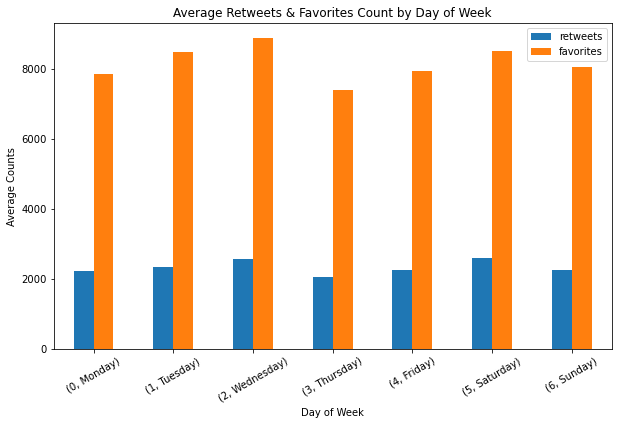

In [1229]:
# make df_week_plot with needed information for bar plot
df_week_plot = archive[['day', 'day_name', 'retweets', 'favorites']].groupby(['day', 'day_name']).mean().sort_index()


# show bar plot 
df_week_plot.plot(kind='bar', 
                  figsize=(10,6),
                  title='Average Retweets & Favorites Count by Day of Week',
                  xlabel='Day of Week',
                  ylabel='Average Counts',
                 )
plt.xticks(rotation=30)

So, if you see the above bar chart, there are not much differences in retweet / favorite counts and day of week. 

### 3. Which breeds of dogs are the top 10 most frequently uploaded for WeRateDog tweets?

In [1262]:
# merge archive and image
archive_image = archive.merge(image, how='left', on='tweet_id')

# make a new datafram with needed columns
dog_breeds = archive_image[['tweet_id', 'p1', 'p1_conf']]

# extract top 10 dog breeds (confidence level above 50%) 
top10 = dog_breeds.query('p1_conf > 0.5').p1.value_counts()[:10]

In [1274]:
# find the periods
archive.timestamp.max(), archive.timestamp.min()

(Timestamp('2017-08-01 00:17:27+0000', tz='UTC'),
 Timestamp('2015-11-15 22:32:08+0000', tz='UTC'))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'golden_retriever'),
  Text(1, 0, 'Pembroke'),
  Text(2, 0, 'Labrador_retriever'),
  Text(3, 0, 'Chihuahua'),
  Text(4, 0, 'pug'),
  Text(5, 0, 'Samoyed'),
  Text(6, 0, 'Pomeranian'),
  Text(7, 0, 'chow'),
  Text(8, 0, 'toy_poodle'),
  Text(9, 0, 'French_bulldog')])

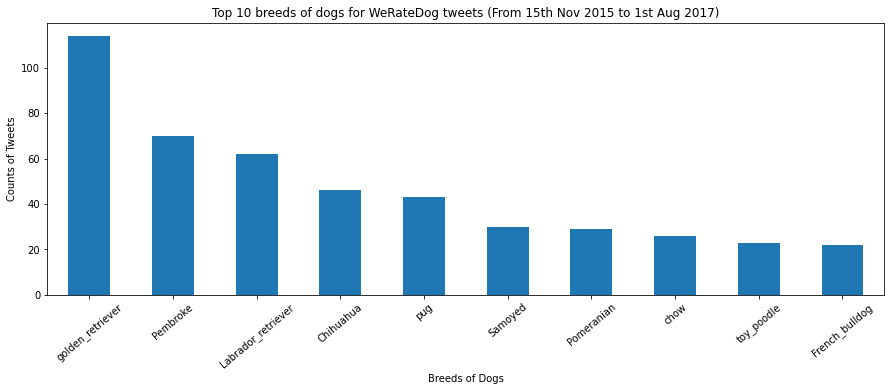

In [1275]:
# make a plot
top10.plot(kind='bar', 
           figsize=(15,5), 
           title='Top 10 breeds of dogs for WeRateDog tweets (From 15th Nov 2015 to 1st Aug 2017)',
           xlabel='Breeds of Dogs',
           ylabel='Counts of Tweets',
          )
plt.xticks(rotation=40)

As shown in the above chart, "Golden Retriever" was the most frequent breed uploaded on the WeRateDog tweets.<br>
The 2nd and 3rd was "Pembroke" and "Labrador Retriever". 

### Insights:
1. There are not much correlation between the retweets & favorites counts and the rating of dogs.


2. The average retweets & favorite counts was almost similar regardless of what day of the week.


3. The most frequent breeds of dogs for WeRateDog tweets was "Golden Retriever" and "Pembroke", "Labrador Retriever" was ranked second and third each during 2015.11.15 ~ 2017.08.01. 